# Tarea semanal cero
## Alumno: Juan Sebastián Fabi
## Profesor: Ing. Mariano Llamedo Soria
## Jefe TP: Ing. César Fuoco
## Curso R4001
## Fecha: Abril 2025

### Sea el siguiente circuito
![Imagen](Entrega_0_imagen.png)

### *Obtener la función transferencia*
$$ T(s) = \frac{V2}{V1}$$
### *módulo, fase y diagrama de polos y ceros*

$$ T(s) = \frac{s - kw0}{s + w0}$$
### Donde:
$$ k = \frac{R2}{R1}$$
$$ w0 = \frac{1}{C1*R3}$$

### Estos dos parametros los podemos utilizar para definir las características del filtro, por un lado tenemos **k**, el cual nos define el tipo de filtro y por otro lado **w0**, la cual nos define la frecuencia.
### Podemoslos aprovechar y normalizar en frecuencia, tomamos 
$$ s = Sn * w0$$
### Entonces, 
$$ T(Sn) = \frac{Sn - k}{Sn + 1} $$
### Por otro lado, para normalizar en impedancia, podemoste tomar R3. Y por otro lado, como la condición real del circuito es que sea un pasa todo, k = 1, entonces R1 = R2 = R3. 


### Si k < 1 (Tomamos como referencia k=0.5)

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

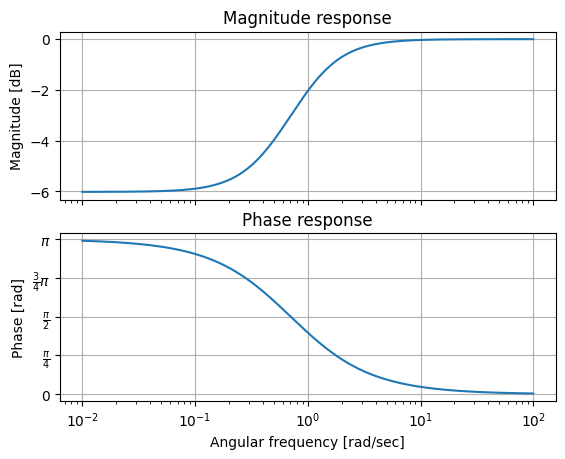

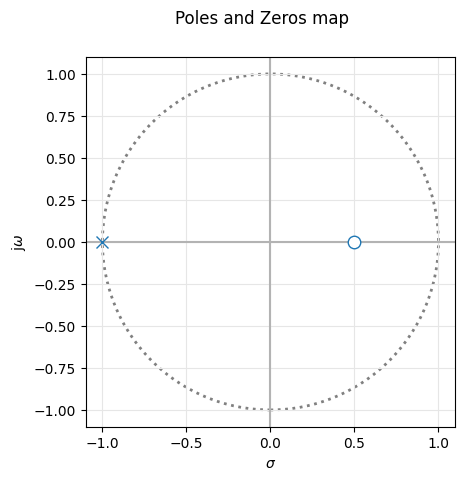

In [1]:
from scipy.signal import TransferFunction

# Librería de TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

k = 0.5

tf_ej0 = TransferFunction( [1, - k], [1, 1] )

bodePlot(tf_ej0, fig_id=1) #Diagrama de bode

pzmap(tf_ej0, fig_id=2) # Diagrama de polos y coros

### Simulando esta condición en LTSPICE
![Imagen](Circuito_1.png)

### La respuesta en frecuencia es:
![Imagen](Frec_1.png)

### En esta condición el circuito se comporta como un circuito pasa alto

### Para k = 1

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

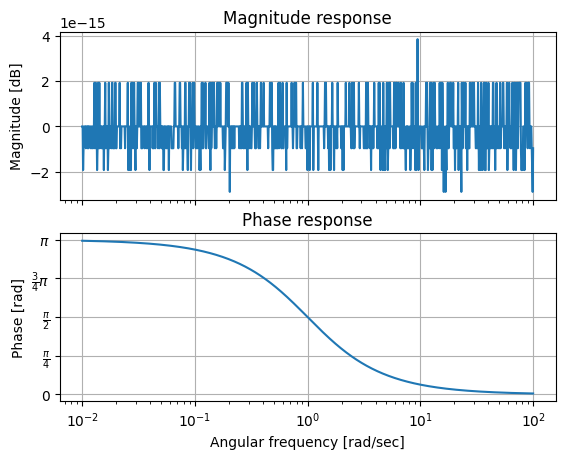

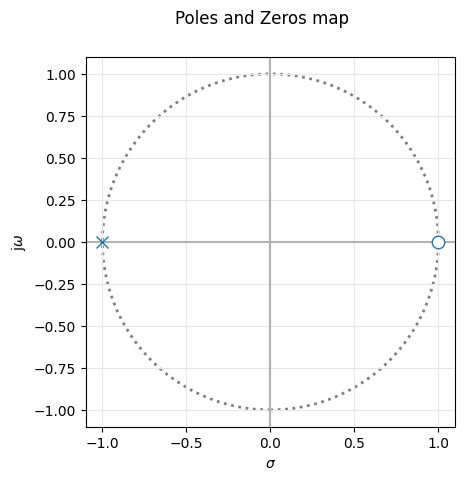

In [2]:
from scipy.signal import TransferFunction

# Librería de TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

k = 1

tf_ej0 = TransferFunction( [1, - k], [1, 1] )

bodePlot(tf_ej0, fig_id=1) #Diagrama de bode

pzmap(tf_ej0, fig_id=2) # Diagrama de polos y coros

### Simulando esta condición 
![Imagen](Frec_2.png)

### Si nos enfocamos en el diagrama del modulo de la transferencia, podemoste observar que el circuito se comporta como un pasa todo (Allpass filter), sin embargo, desde el punto de vista de la fase, el circuito es un rotador de fase.
#### Ref1: Pag 468/469 Analisis y sistesis de redes lineales I (Ing. Alberto Araujo)
#### Ref2: Pag 96/97 Design of analog filter (Schaumann)

### Para k>1 (Definimos k = 2)

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

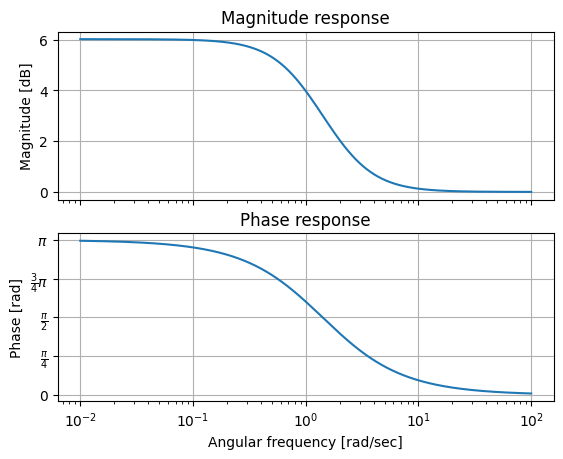

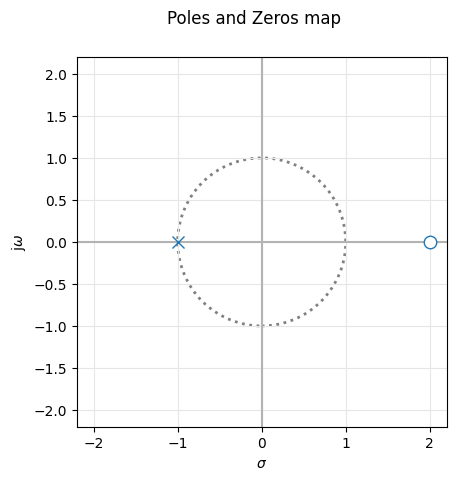

In [4]:
from scipy.signal import TransferFunction

# Librería de TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

k = 2

tf_ej0 = TransferFunction( [1, - k], [1, 1] )

bodePlot(tf_ej0, fig_id=1) #Diagrama de bode

pzmap(tf_ej0, fig_id=2) # Diagrama de polos y coros

#### Simulando esta condición
![Imagen](Frec_3.png)

### En esta condición el circuito se comporta como un pasa bajo

### 5. El circuito MF103 pertenece a un dispositivo que se encarga de cambiar la fase en aplicaciónes de audio. 
### Respondiendonoslos la pregunta, nuestro filtro es un pasa todo, pero al mismo tiempo, para una frecuencia en particular, puede cambiar la fase con respecto a la señal de entrada sin modificar su amplitud.
### La primer diferencia es el que el MF103 utiliza OTA's, por lo tanto, no no es el mismo circuito.


### Bonus Nº1
![Imagen](Red_Normalizada.png)
![Imagen](Respuesta_Red_normalizada.png)

In [1]:
### Bonus 2 FALTA

### Bonus 3
### El analisis de la red se encuentra en el PDF adjunto
### Es una red pasa todo de orden 2. El Q es fijado por la red RC, y como en este caso puntual ampas redes tienen el mismo valor, el Q=1/3, por lo tanto nos fija k = 1/5. A Continuación esta el analisis tanto en LTSPICE como en Phyton
![Imagen](Red_Bonus_3.png)
![Imagen](Respuesta_Red_Bonus_3.png)

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

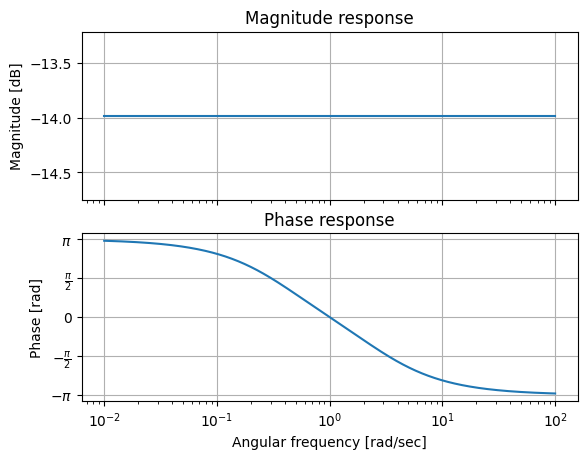

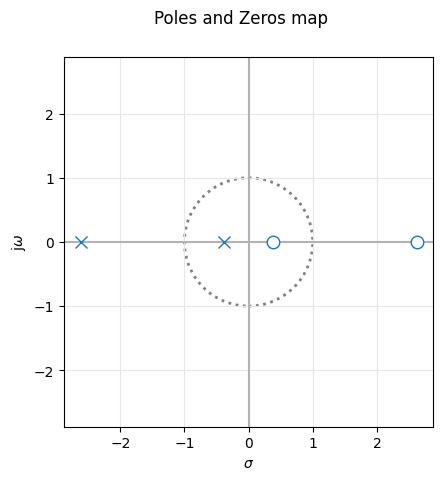

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 27 20:21:36 2025

@author: juansebastianfabi
"""

from scipy.signal import TransferFunction
##import matplotlib.pyplot as plt
##import numpy as np
##from sympy import init_session

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

w0 = 1
k = 1

my_tf = TransferFunction( [-(1/5), 3/5, -(1/5)], [1, 3, 1] )

bodePlot(my_tf, fig_id=1)

pzmap(my_tf, fig_id=2) #S plane pole/zero plot


### Podemoslo observar que el modulo de la transferencia no es unitario como el caso anterior. En este caso es de -14dB. Este se debe a que la transferencia esta multiplicada por k, y al ser este valor igual a 1/5
$$ |T(0)|= 20 * log (k) $$
$$ |T(0)|= - 14 dB $$
